In [8]:
# !pip install crim_intervals
# !pip install ipython_genutils

In [10]:
from crim_intervals import * 
import crim_intervals.visualizations as viz
%matplotlib inline

from IPython.display import YouTubeVideo

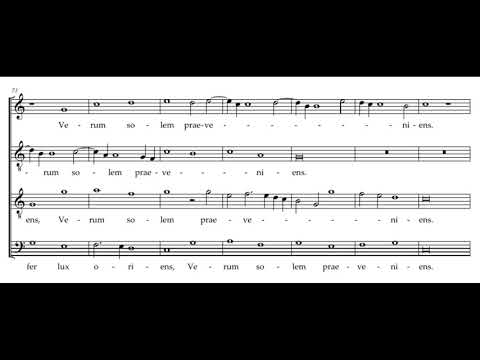

In [15]:
YouTubeVideo('s-pVbpV4yuk', width=800, height=400)

In [46]:
piece = importScore("https://crimproject.org/mei/CRIM_Model_0008.mei")

In [47]:
piece

In [48]:
piece.metadata

{'title': 'Ave Maria', 'composer': 'Josquin Des Prés', 'date': 1502}

In [49]:
notes = piece.notes().fillna("-")

notes

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,-,-,-
12.0,C5,-,-,-
16.0,D5,G3,-,-
20.0,E5,C4,-,-
...,...,...,...,...
1248.0,C5,E4,C4,A3
1252.0,-,F4,-,-
1256.0,B4,G4,D4,G3
1272.0,C5,G4,C4,C3


In [50]:
notes.T

,0.0,4.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,...,1224.0,1232.0,1236.0,1240.0,1244.0,1248.0,1252.0,1256.0,1272.0,1288.0
[Superius],G4,C5,C5,D5,E5,C5,-,Rest,-,-,...,E5,Rest,E5,E5,D5,C5,-,B4,C5,C5
Altus,Rest,-,-,G3,C4,-,C4,D4,E4,C4,...,G4,Rest,G4,G4,G4,E4,F4,G4,G4,G4
Tenor,Rest,-,-,-,-,-,-,G3,C4,-,...,C4,Rest,C4,C4,B3,C4,-,D4,C4,C4
Bassus,Rest,-,-,-,-,-,-,-,-,-,...,C3,Rest,C3,C4,G3,A3,-,G3,C3,C3


## Cadences

In [51]:
cadences = piece.cadences()

In [52]:
cadences

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext
Last,,,,,,,,,,,,,,
188.0,Evaded Authentic,1.0,TCb,E3,M3,G,P5,4/2,24,3.0,3.0,0.145963,188.0,44.0
232.0,Evaded Authentic,1.0,CuTb,A2,-m3,C,P8,4/2,30,1.0,4.0,0.180124,44.0,40.0
272.0,Phrygian Clausula Vera,1.0,CT,E4,M10,E,M3,4/2,35,1.0,2.0,0.211180,40.0,32.0
304.0,Phrygian Clausula Vera,1.0,ACT,E3,M3,E,M3,4/2,39,1.0,3.0,0.236025,32.0,112.0
416.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,53,1.0,4.0,0.322981,112.0,56.0
472.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,60,1.0,4.0,0.366460,56.0,40.0
512.0,Clausula Vera,1.0,tCT,C3,P1,C,P8,4/2,65,1.0,3.0,0.397516,40.0,96.0
608.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,77,1.0,3.0,0.472050,96.0,32.0
640.0,Clausula Vera,1.0,TC,C3,P1,G,P5,4/2,81,1.0,4.0,0.496894,32.0,24.0


In [53]:
cadences["Tone"].value_counts()

C    9
G    6
E    3
Name: Tone, dtype: int64

In [54]:
piece.cadenceRadarPlot()

In [55]:
cadences_G = cadences[ cadences["Tone"] == "G" ] # read: "Show me the cadences, where the cadence is on tone G.

In [56]:
cadences_G

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext
Last,,,,,,,,,,,,,,
188.0,Evaded Authentic,1.0,TCb,E3,M3,G,P5,4/2,24,3.0,3.0,0.145963,188.0,44.0
640.0,Clausula Vera,1.0,TC,C3,P1,G,P5,4/2,81,1.0,4.0,0.496894,32.0,24.0
664.0,Clausula Vera,1.0,TC,G3,P5,G,P5,4/2,84,1.0,4.0,0.515528,24.0,24.0
1008.0,Clausula Vera,1.0,TC,G3,P5,G,P5,4/2,119,1.0,3.0,0.782609,80.0,64.0
1072.0,Clausula Vera,1.0,TC,G3,P5,G,P5,4/2,127,1.0,2.0,0.832298,64.0,24.0
1184.0,Altizans Only,0.0,AT,C3,P1,G,P5,4/2,141,1.0,3.0,0.919255,36.0,120.0


In [58]:
piece.verovioCadences( cadences_G.iloc[:2,:] )

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Cadence End Measure: 24
Beat:  3.0
Cadence Tone:  G
Cadence Type:  Evaded Authentic
Cadential Voice Functions:  TCb


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Cadence End Measure: 81
Beat:  1.0
Cadence Tone:  G
Cadence Type:  Clausula Vera
Cadential Voice Functions:  TC


In [ ]:
cadences

In [60]:
piece.cvfs().fillna("-")

,[Superius],Altus,Tenor,Bassus
Last,,,,
188.0,-,T,C,b
232.0,C,u,T,b
272.0,C,T,-,-
304.0,-,A,C,T
416.0,C,-,T,B
472.0,C,T,B,-
512.0,t,-,C,T
608.0,C,-,T,B
640.0,T,C,-,-


TypeError: show() got an unexpected keyword argument 'renderer'

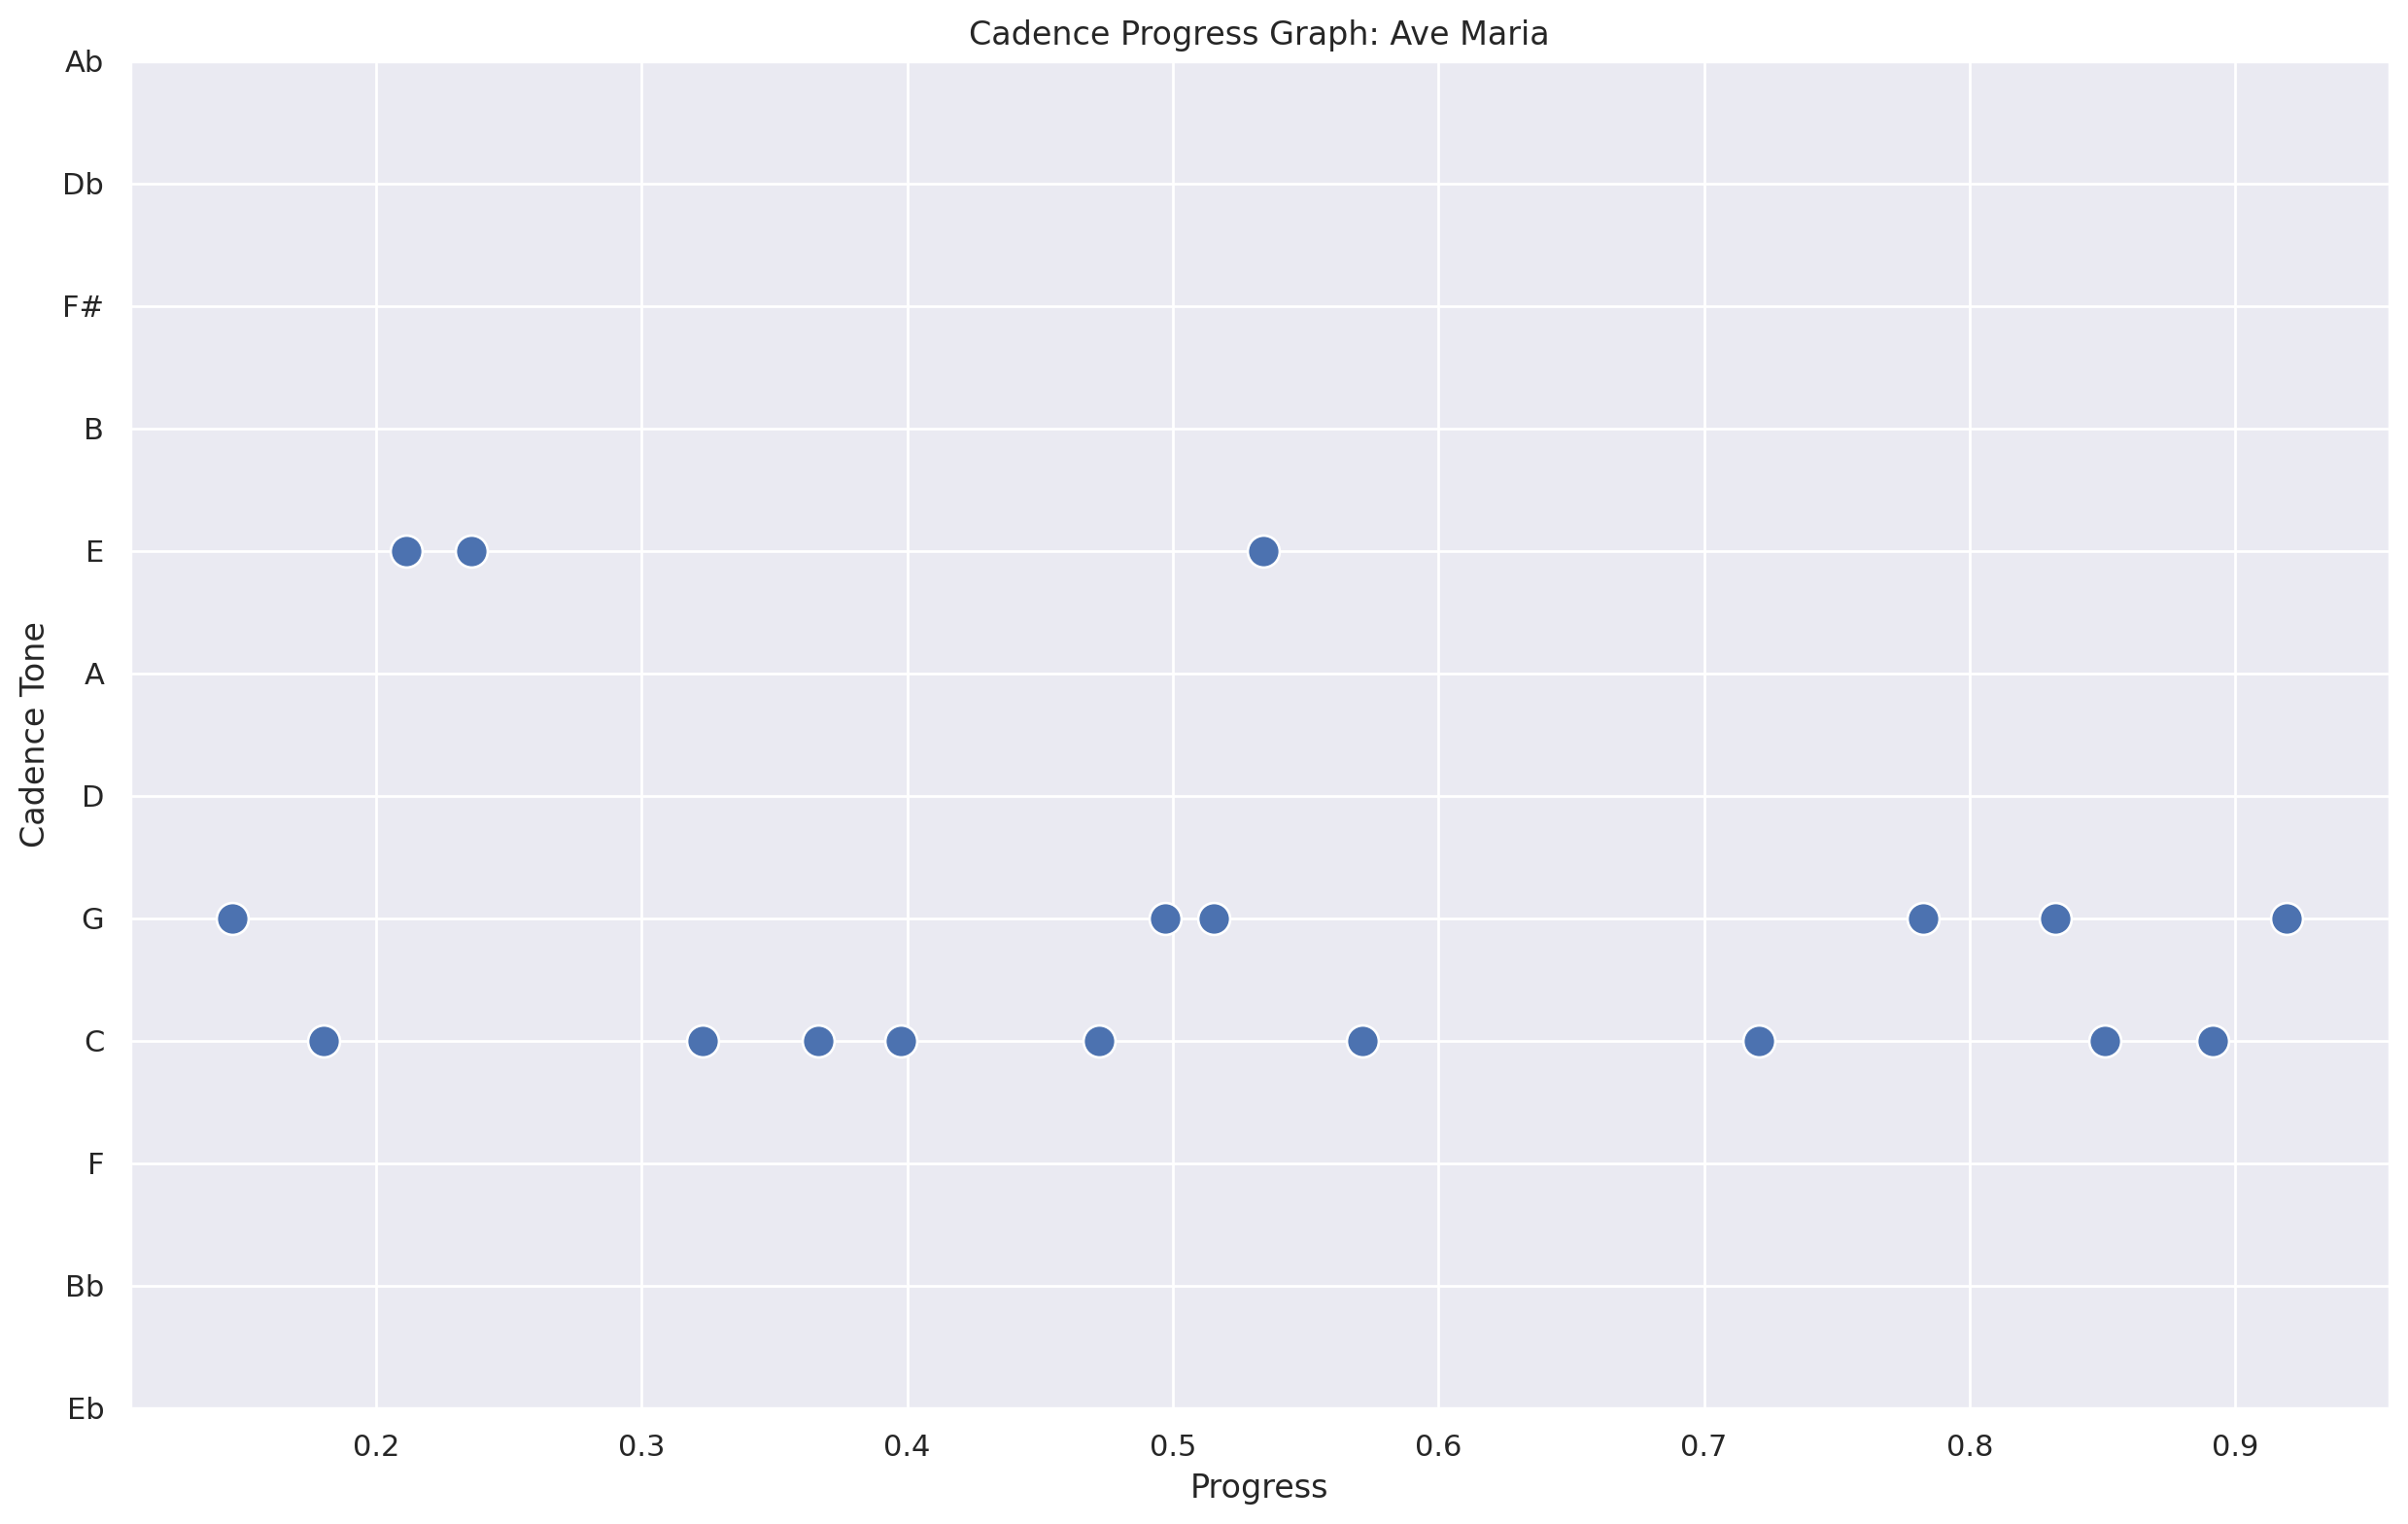

In [61]:
piece.cadenceProgressPlot()

In [62]:
cadences.iloc[-1,:]

CadType         Altizans Only
LeadingTones              0.0
CVFs                       AT
Low                        C3
RelLow                     P1
Tone                        G
RelTone                    P5
TSig                      4/2
Measure                   141
Beat                      1.0
Sounding                  3.0
Progress             0.919255
SinceLast                36.0
ToNext                  120.0
Name: 1184.0, dtype: object

In [63]:
piece.verovioCadences(cadences.iloc[-1:,:])

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Cadence End Measure: 141
Beat:  1.0
Cadence Tone:  G
Cadence Type:  Altizans Only
Cadential Voice Functions:  AT


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


In [64]:
piece.final()

'C3'

## Intervals

In [ ]:
# piece.ngrams()

In [65]:
piece.notes()

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,NaN,NaN,NaN
12.0,C5,NaN,NaN,NaN
16.0,D5,G3,NaN,NaN
20.0,E5,C4,NaN,NaN
...,...,...,...,...
1248.0,C5,E4,C4,A3
1252.0,NaN,F4,NaN,NaN
1256.0,B4,G4,D4,G3
1272.0,C5,G4,C4,C3


In [69]:
piece.harmonic().fillna("-")

,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
0.0,Rest,Rest,Rest,Rest,Rest,Rest
4.0,-,-,Rest,-,Rest,Rest
8.0,Rest,Rest,Rest,Rest,Rest,Rest
12.0,-,-,Rest,-,Rest,Rest
16.0,Rest,Rest,Rest,Rest,Rest,P12
...,...,...,...,...,...,...
1248.0,m3,P5,m10,M3,P8,m6
1252.0,-,m6,-,P4,-,P5
1256.0,P5,P8,M10,P4,M6,M3
1272.0,P8,P12,P15,P5,P8,P4


In [68]:
piece.melodic().fillna("-")

,[Superius],Altus,Tenor,Bassus
0.0,-,Rest,Rest,Rest
4.0,P4,-,-,-
8.0,-,Rest,Rest,Rest
12.0,P1,-,-,-
16.0,M2,-,Rest,Rest
...,...,...,...,...
1248.0,-M2,-m3,m2,M2
1252.0,-,m2,-,-
1256.0,-m2,M2,M2,-M2
1272.0,m2,P1,-M2,-P5


In [70]:
piece.sonorities()

,Sonority
0.0,
4.0,
8.0,
12.0,
16.0,5
...,...
1248.0,5/3
1252.0,6/3
1256.0,5/3
1272.0,5


## Presentation Types

In [71]:
ptypes = piece.presentationTypes()

In [73]:
# ptypes

In [74]:
ptypes["Presentation_Type"]

0      PEN
1      PEN
2      PEN
3     FUGA
4     FUGA
5     FUGA
6      NIM
7       ID
8       ID
9     FUGA
10    FUGA
11     NIM
12      ID
13      ID
14    FUGA
15    FUGA
Name: Presentation_Type, dtype: object

In [75]:
ptypes["Presentation_Type"].value_counts()

FUGA    7
ID      4
PEN     3
NIM     2
Name: Presentation_Type, dtype: int64

In [76]:
ID = ptypes[ptypes["Presentation_Type"] == "ID"]
NIM = ptypes[ptypes["Presentation_Type"] == "NIM"]

In [78]:
piece.verovioPtypes(ID)

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 54-64
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('4', '-2', '2', '2')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [4.0, 36.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 64-73
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('2', '-3', '2', '-3')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [16.0, 8.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 94-102
Presentation Type:  ID
Voices:  ['[Superius]', 'Tenor', '[Superius]', 'Tenor']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '1')]
Melodic Entry Intervals:  ['P-5', 'P5', 'P-5']
Time Entry Intervals:  [4.0, 44.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 111-126
Presentation Type:  ID
Voices:  ['[Superius]', 'Tenor', '[Superius]', 'Tenor']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '-2')]
Melodic Entry Intervals:  ['P-8', 'P8', 'P-8']
Time Entry Intervals:  [24.0, 40.0, 24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


**Heatmap**

In [79]:
# # define the model list
# model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei', 'https://crimproject.org/mei/CRIM_Model_0011.mei', 'https://crimproject.org/mei/CRIM_Model_0014.mei']

# # and the mass list:
# mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei', 'https://crimproject.org/mei/CRIM_Mass_0008_2.mei', 'https://crimproject.org/mei/CRIM_Mass_0008_3.mei']

# # now build each of these lists as a pair of corpora:
# mod_corp = CorpusBase(model_list)
# mass_corp = CorpusBase(mass_list)

In [81]:
# mod_corp = CorpusBase(model_list)
# mass_corp = CorpusBase(mass_list)
# module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
# module_matrix

In [83]:
# dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
# plt.show()

In [84]:
corpus_list = [
    'https://crimproject.org/mei/CRIM_Model_0008.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_1.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_2.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_3.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_4.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_5.mei'
]

In [85]:
model = corpus_list[0] # <== the model will be score "0" in the previous list
model = importScore(model)

In [86]:
mass_movement = corpus_list[1] # <== select the index number of your mass movement from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
# print(model.metadata, mass_movement.metadata)

In [117]:
# set parameters:
thematic = True
anywhere = True
offset = True
progress = True
n = 2

In [118]:
model_entries = model.entries(thematic=thematic, anywhere=anywhere, n=n)
model_entries_det = model.detailIndex(model_entries, offset=offset, progress=progress)
model_entries_det

[Superius]    Altus    Tenor    Bassus
Measure Beat Offset Progress                                       
1       1.0  0.0    0.000000     (4, 2)      NaN      NaN       NaN
        3.0  4.0    0.003106     (2, 2)      NaN      NaN       NaN
3       1.0  16.0   0.012422    (2, -3)   (4, 2)      NaN       NaN
        3.0  20.0   0.015528        NaN   (2, 2)      NaN       NaN
5       1.0  32.0   0.024845        NaN  (2, -3)   (4, 2)       NaN
...                                 ...      ...      ...       ...
145     1.0  1216.0 0.944099        NaN      NaN   (2, 2)  (-2, -2)
        4.0  1222.0 0.948758        NaN      NaN      NaN  (-2, -2)
147     3.0  1236.0 0.959627   (-2, -2)  (-3, 2)  (-2, 2)       NaN
148     3.0  1244.0 0.965839   (-2, -2)      NaN   (2, 2)   (2, -2)
149     1.0  1248.0 0.968944    (-2, 2)   (2, 2)  (2, -2)       NaN

[411 rows x 4 columns]

In [119]:
mass_movement_entries = mass_movement.entries(thematic=thematic, anywhere=anywhere, n=n)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=offset, progress=progress)

In [120]:
# print(model_entries_det, mass_movement_entries_det)

In [121]:
model_entries = model.entries(thematic=True, anywhere=True, n=n)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=n)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[:]
shared_entries

[('2', '-2'),
 ('2', '2'),
 ('4', '-2'),
 ('2', '-3'),
 ('-3', '-2'),
 ('4', '2'),
 ('-2', '-2')]

In [122]:
nr = model.notes(combineUnisons=True)
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False) 
mel_ngrams = model.ngrams(df=mel, n=n) 
entry_ngrams = model.entries(df=mel, n=n) 
mel_ngrams_duration = model.durations(df=mel, n=n, mask_df=entry_ngrams) 
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)

alt.Chart(...)

In [ ]:
nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)